In [2]:
import numpy as np
import matplotlib.pylab as plt

# 나쁜 예
# 문제점1. 반올림 오차: h = 1e-50은 float32로 나타내면 반올림되어 0.0으로 처리됨 
# 문제점2. h를 무한히 0으로 줄일 수 없기 때문에 진정한 미분값이 나오지 않음
def numerical_diff_bad(f, x):
    h = 1e-50
    return (f(x + h) - f(x)) / h

# 개선1. h = 1e-4로 변경 
# 개선2. 중앙 차분 사용
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

0.1999999999990898


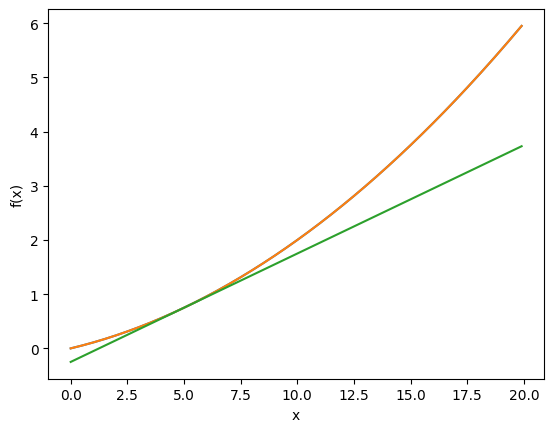

In [5]:
def function_1(x):
    # 0.01 * x^2 + 0.1 * x
    return 0.01 * x ** 2 + 0.1 * x

plt.xlabel("x")
plt.ylabel("f(x)")

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.plot(x, y)

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

tf = tangent_line(function_1, 5)
y2 = tf(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [21]:
# 변수가 2개인 함수
def function_2(x):
    return x[0]**2 + x[1]**2

# x0 = 3, x1 = 4 일때 x0에 대한 편미분
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

print(numerical_diff(function_tmp1, 3.0))

# x0 = 3, x1 = 4 일때 x1에 대한 편미분
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp2, 4.0))

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 같은 shape인 배열 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        # 중앙 차분(수치 미분)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    
    return grad

6.00000000000378
7.999999999999119


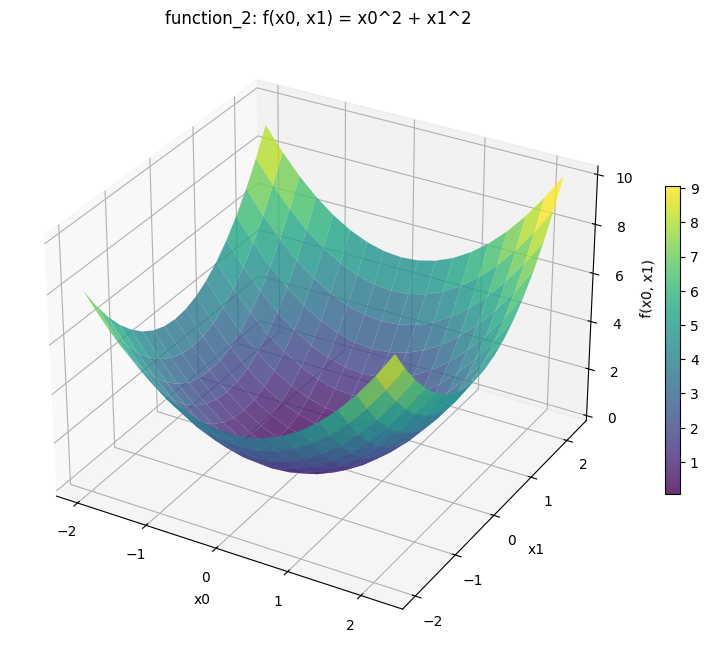

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
Z = function_2(np.array([X, Y]))

# 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# 축 레이블
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('f(x0, x1)')

# 컬러바
fig.colorbar(surf, ax=ax, shrink=0.5)

plt.show()

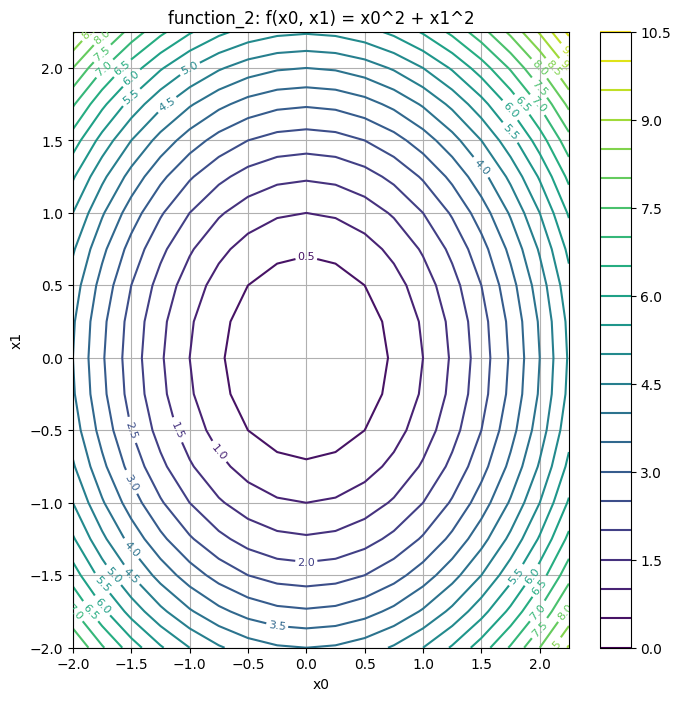

In [19]:
# function_2 계산
Z = function_2(np.array([X, Y]))

# Contour plot
plt.figure(figsize=(8, 8))
contour = plt.contour(X, Y, Z, levels=20)
plt.clabel(contour, inline=True, fontsize=8)

plt.xlabel('x0')
plt.ylabel('x1')
plt.title('function_2: f(x0, x1) = x0^2 + x1^2')
plt.colorbar(contour)
plt.grid(True)
plt.show()

(-2.0, 2.0)

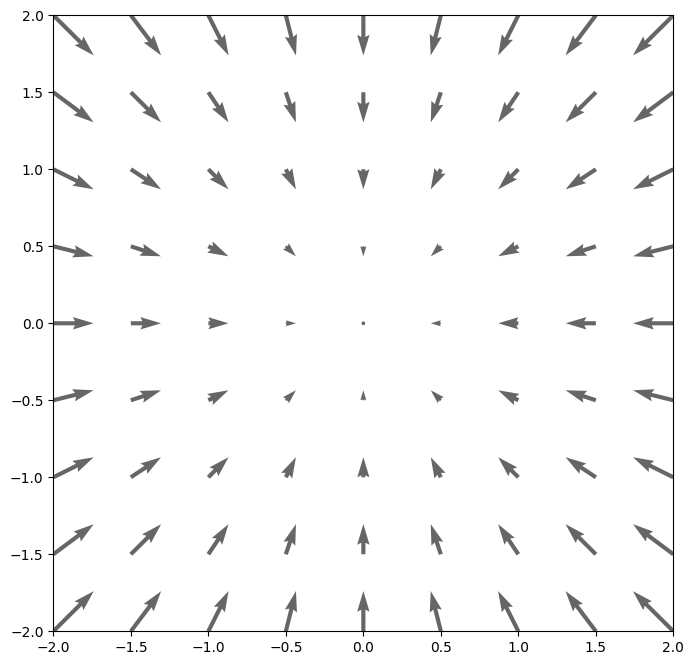

In [23]:
x0 = np.arange(-2, 2.5, 0.5)
x1 = np.arange(-2, 2.5, 0.5)
X, Y = np.meshgrid(x0, x1)

# function_2 계산
Z = function_2(np.array([X, Y]))

# 각 점에서 gradient 계산
U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        point = np.array([X[i, j], Y[i, j]])
        grad = numerical_gradient(function_2, point)
        U[i, j] = grad[0]
        V[i, j] = grad[1]

# 화살표 그리기
plt.figure(figsize=(8, 8))
plt.quiver(X, Y, -U, -V, angles="xy", color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])